<a href="https://colab.research.google.com/github/Eswa2020/Data-analysis-and-wrangling-various-projects/blob/master/clear__Mel_PARKING_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries and loading dataset

In [1]:
#importimg our libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
%matplotlib inline

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#let's load the  dataset
dataq=pd.read_csv("/content/drive/MyDrive/melbourne_parking_data.csv",encoding='ISO-8859-1')
dataq.head(2)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,StreetMarker,SignPlateID,Sign,AreaName,StreetId,StreetName,BetweenStreet1ID,BetweenStreet1,BetweenStreet2ID,BetweenStreet2,SideOfStreet,SideOfStreetCode,SideName,BayId,InViolation,VehiclePresent
0,17176,02/15/2019 07:45:29 PM,02/15/2019 07:46:52 PM,1,13009S,NaN,NaN,Docklands,528,COLLINS STREET,1285,SPENCER STREET,79,BATMANS HILL DRIVE,4,S,South,6005,False,True
1,17176,03/25/2019 08:35:40 PM,03/25/2019 08:39:08 PM,4,13009S,NaN,NaN,Docklands,528,COLLINS STREET,1285,SPENCER STREET,79,BATMANS HILL DRIVE,4,S,South,6005,False,True


In [4]:
dataq.tail(2)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,StreetMarker,SignPlateID,Sign,AreaName,StreetId,StreetName,BetweenStreet1ID,BetweenStreet1,BetweenStreet2ID,BetweenStreet2,SideOfStreet,SideOfStreetCode,SideName,BayId,InViolation,VehiclePresent
1048573,17418,05/15/2019 04:31:54 PM,05/15/2019 04:32:56 PM,1,13397W,430.0,1/4P M-F 16:00-18:30,Docklands,1383,VILLAGE STREET,131,BRENTANI WAY,974,MCCRAE STREET,5,W,West,6320,False,False
1048574,17418,05/25/2019 06:10:25 PM,05/25/2019 06:18:14 PM,8,13397W,362.0,1P SAT-SUN 7:30-18:30,Docklands,1383,VILLAGE STREET,131,BRENTANI WAY,974,MCCRAE STREET,5,W,West,6320,False,True


## Exploring our dataset

In [ ]:
dataq.shape

(1048575, 20)

In [ ]:
dataq.isna().sum()

DeviceId                 0
ArrivalTime              0
DepartureTime            0
DurationMinutes          0
StreetMarker             0
SignPlateID         286382
Sign                286382
AreaName                 1
StreetId                 0
StreetName               0
BetweenStreet1ID         0
BetweenStreet1           0
BetweenStreet2ID         0
BetweenStreet2           0
SideOfStreet             0
SideOfStreetCode         0
SideName                 0
BayId                    0
InViolation              0
VehiclePresent           0
dtype: int64

In [ ]:
dataq.duplicated().sum()

407

In [ ]:
dataq.dtypes

DeviceId              int64
ArrivalTime          object
DepartureTime        object
DurationMinutes       int64
StreetMarker         object
SignPlateID         float64
Sign                 object
AreaName             object
StreetId              int64
StreetName           object
BetweenStreet1ID      int64
BetweenStreet1       object
BetweenStreet2ID      int64
BetweenStreet2       object
SideOfStreet          int64
SideOfStreetCode     object
SideName             object
BayId                 int64
InViolation            bool
VehiclePresent         bool
dtype: object

In [ ]:
dataq.info

<bound method DataFrame.info of          DeviceId             ArrivalTime           DepartureTime  \
0           17176  02/15/2019 07:45:29 PM  02/15/2019 07:46:52 PM   
1           17176  03/25/2019 08:35:40 PM  03/25/2019 08:39:08 PM   
2           17176  01/17/2019 05:28:55 AM  01/17/2019 06:57:09 AM   
3           17176  03/13/2019 10:18:17 PM  03/13/2019 10:18:24 PM   
4           17176  01/18/2019 06:04:37 AM  01/18/2019 06:07:29 AM   
...           ...                     ...                     ...   
1048570     17419  01/21/2019 07:17:38 AM  01/21/2019 07:30:00 AM   
1048571     17418  11/18/2019 10:05:57 PM  11/18/2019 10:07:31 PM   
1048572     17420  06/13/2019 09:30:00 AM  06/13/2019 10:02:23 AM   
1048573     17418  05/15/2019 04:31:54 PM  05/15/2019 04:32:56 PM   
1048574     17418  05/25/2019 06:10:25 PM  05/25/2019 06:18:14 PM   

         DurationMinutes StreetMarker  SignPlateID                   Sign  \
0                      1       13009S          NaN            

In [ ]:
descriptive_stats = dataq.describe()
print(descriptive_stats)

           DeviceId  DurationMinutes    SignPlateID      StreetId  \
count  1.048575e+06     1.048575e+06  762193.000000  1.048575e+06   
mean   1.731886e+04     4.799476e+01     285.859107  5.186585e+02   
std    2.998304e+02     9.260124e+01     158.747030  3.813933e+02   
min    1.003600e+04     0.000000e+00       3.000000  5.000000e+00   
25%    1.725800e+04     3.000000e+00     196.000000  1.230000e+02   
50%    1.731300e+04     1.200000e+01     285.000000  5.280000e+02   
75%    1.736800e+04     4.600000e+01     421.000000  7.530000e+02   
max    2.842100e+04     1.440000e+03     715.000000  1.497000e+03   

       BetweenStreet1ID  BetweenStreet2ID  SideOfStreet         BayId  
count      1.048575e+06      1.048575e+06  1.048575e+06  1.048575e+06  
mean       6.465055e+02      6.902358e+02  3.344938e+00  6.236924e+03  
std        4.197601e+02      5.153619e+02  1.092222e+00  2.275697e+02  
min        5.000000e+00      5.000000e+00  1.000000e+00  5.690000e+02  
25%        1.23000

In [ ]:
descriptive_stats .to_csv('results.csv', index=False)

In [ ]:
mode_values = dataq.mode()
median_values = dataq.median()
standard_deviation = dataq.std()


<ipython-input-11-0e88c72a3a4a>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = dataq.median()
<ipython-input-11-0e88c72a3a4a>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  standard_deviation = dataq.std()


In [ ]:
correlation = descriptive_stats.corr()
correlation

,DeviceId,DurationMinutes,SignPlateID,StreetId,BetweenStreet1ID,BetweenStreet2ID,SideOfStreet,BayId
DeviceId,1.000000,0.999782,0.999777,0.999782,0.999781,0.999780,0.999764,0.999895
DurationMinutes,0.999782,1.000000,1.000000,1.000000,1.000000,0.999999,0.999999,0.999972
SignPlateID,0.999777,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999972
StreetId,0.999782,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.999973
BetweenStreet1ID,0.999781,1.000000,1.000000,1.000000,1.000000,1.000000,0.999999,0.999973
BetweenStreet2ID,0.999780,0.999999,1.000000,1.000000,1.000000,1.000000,0.999999,0.999973
SideOfStreet,0.999764,0.999999,1.000000,0.999999,0.999999,0.999999,1.000000,0.999967
BayId,0.999895,0.999972,0.999972,0.999973,0.999973,0.999973,0.999967,1.000000


In [69]:
dataq.dtypes

DeviceId                    int64
ArrivalTime        datetime64[ns]
DepartureTime      datetime64[ns]
DurationMinutes             int64
AreaName                   object
StreetName                 object
BayId                       int64
InViolation                  bool
VehiclePresent               bool
Month                       int64
Year                        int64
Day                         int64
hourarrive                  int64
secondarrive                int64
minutearrive                int64
seconddepart                int64
minutedepart                int64
day_of_week                object
day_type                   object
arrival_hour                int64
time_of_day                object
season                     object
public_holiday              int64
dtype: object

In [73]:
# Calculate frequency of 'Vehicle_Status'
vehicle_status_freq = dataq['VehiclePresent'].value_counts()

# Calculate frequency of 'Inviolation'
in_violation_freq = dataq['InViolation'].value_counts()

# Print the frequency distributions
print("Vehicle Presence Frequency:")
print(vehicle_status_freq)

print("\In Violation Frequency:")
print(in_violation_freq)

Vehicle Presence Frequency:
True     537207
False    511368
Name: VehiclePresent, dtype: int64
\In Violation Frequency:
False    993420
True      55155
Name: InViolation, dtype: int64


In [75]:
# Calculate frequency percentages of 'Vehicle_Status'
vehicle_presence_percent = (dataq['VehiclePresent'].value_counts(normalize=True) * 100)

# Calculate frequency percentages of 'Inviolation'
in_violation_percent = (dataq['InViolation'].value_counts(normalize=True) * 100)

# Print the frequency percentages
print("Vehicle Status Frequency Percent:")
print(vehicle_presence_percent)

print("\In Violation Frequency Percent:")
print(in_violation_percent)

Vehicle Status Frequency Percent:
True     51.232101
False    48.767899
Name: VehiclePresent, dtype: float64
\In Violation Frequency Percent:
False    94.740004
True      5.259996
Name: InViolation, dtype: float64



##Cleaning Data

**Class distribution**
First, let’s look at the frequency distribution by parking zones (see Figure 3). Unsurprisingly, Zone 1 was most common since we would always try to find a parking space closest to my apartment block. The distribution also suggests a class imbalance, something to take into consideration when building and evaluating an ML model.



**Hour of the day**
Next, let’s look at the percentage of parking sessions across different hours of the day by parking zones (see Figure 4). The later I returned home, the more unlikely it was to find parking space in Zone 1. This was common sense, but it was good to know that the data I collected validated this observation. Based on Figure 4, it also appeared that hour could be a useful feature in predicting parking availability.

**Day of the week**
I also asked myself, “Are there certain days of the week where it is less probable to find a parking space in Zone 1?” Based on the data collected, yes! The probability of getting a parking space in Zone 1 was the highest on Mondays (~83%), decreased over the week days and was the lowest on Thursdays (~59%) and Sundays (~61%). Thus, day_of_week could also be a useful predictor for parking availability.

**Public holiday, eve, or neither?**
Through out the data collection period, it felt like it was harder to find a parking space in Zone 1 on public holidays. I guessed it was because the next day could be a working/schooling day and residents tend to stay home. The opposite was true for public holiday eves, meaning residents might not return home early since the next day was a public holiday.

In [5]:
#since the data is mostly clean we start with changing the date column from"object"to"date"
#convert column to datetime pandas
dataq['ArrivalTime'] = pd.to_datetime(dataq['ArrivalTime'])


In [6]:
#since the data is mostly clean we start with changing the date column from"object"to"date"
#convert column to datetime pandas
dataq['DepartureTime'] = pd.to_datetime(dataq['DepartureTime'])


In [7]:
dataq.dtypes

DeviceId                     int64
ArrivalTime         datetime64[ns]
DepartureTime       datetime64[ns]
DurationMinutes              int64
StreetMarker                object
SignPlateID                float64
Sign                        object
AreaName                    object
StreetId                     int64
StreetName                  object
BetweenStreet1ID             int64
BetweenStreet1              object
BetweenStreet2ID             int64
BetweenStreet2              object
SideOfStreet                 int64
SideOfStreetCode            object
SideName                    object
BayId                        int64
InViolation                   bool
VehiclePresent                bool
dtype: object

In [8]:
#we drop all unnecessary columns,we first drop signplateID Since we wont need it in our analysis
#also we drop all other primary key columns sinceon eis enough
#SignPlateID ,StreetId,BayId

dataq.drop(columns=["Sign","SignPlateID","BetweenStreet1","BetweenStreet2","BetweenStreet1ID","BetweenStreet2ID"] ,axis=1, inplace=True)

In [9]:
dataq.drop(columns=["StreetId","StreetMarker","SideOfStreet","SideOfStreetCode","SideName"] ,axis=1, inplace=True)

In [10]:
#also drop all the null values
# using dropna() function
dataq.dropna()
dataq.head(2)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True
1,17176,2019-03-25 20:35:40,2019-03-25 20:39:08,4,Docklands,COLLINS STREET,6005,False,True


In [11]:
dataq.isna().sum()

DeviceId           0
ArrivalTime        0
DepartureTime      0
DurationMinutes    0
AreaName           1
StreetName         0
BayId              0
InViolation        0
VehiclePresent     0
dtype: int64

In [12]:
print(dataq.columns.tolist())

['DeviceId', 'ArrivalTime', 'DepartureTime', 'DurationMinutes', 'AreaName', 'StreetName', 'BayId', 'InViolation', 'VehiclePresent']


In [13]:
#Exctract month and create a dedicated column df["Month"] from a
#column in datetime format df["Date"]
dataq['Month'] = pd.DatetimeIndex(dataq['ArrivalTime']).month

In [14]:
#Exctract month and create a dedicated column df["Month"] from a
#column in datetime format df["Date"]
dataq['Year'] = pd.DatetimeIndex(dataq['ArrivalTime']).year

In [15]:
#Exctract day and create a dedicated column df["Day"] from a
#column in datetime format df["Date"]
dataq['Day'] = pd.DatetimeIndex(dataq['DepartureTime']).day

In [16]:
#Exctract day and create a dedicated column df["Day"] from a
#column in datetime format df["Date"]
dataq['hourarrive'] = pd.DatetimeIndex(dataq['ArrivalTime']).hour

In [17]:
#Exctract day and create a dedicated column df["Day"] from a
#column in datetime format df["Date"]
dataq['secondarrive'] = pd.DatetimeIndex(dataq['ArrivalTime']).second

In [18]:
#Exctract day and create a dedicated column df["Day"] from a
#column in datetime format df["Date"]
dataq['minutearrive'] = pd.DatetimeIndex(dataq['ArrivalTime']).minute

In [19]:
#Exctract day and create a dedicated column df["Day"] from a
#column in datetime format df["Date"]
dataq['seconddepart'] = pd.DatetimeIndex(dataq['DepartureTime']).second

In [20]:
#Exctract day and create a dedicated column df["Day"] from a
#column in datetime format df["Date"]
dataq['minutedepart'] = pd.DatetimeIndex(dataq['DepartureTime']).minute

In [21]:
print(dataq.columns.tolist())

['DeviceId', 'ArrivalTime', 'DepartureTime', 'DurationMinutes', 'AreaName', 'StreetName', 'BayId', 'InViolation', 'VehiclePresent', 'Month', 'Year', 'Day', 'hourarrive', 'secondarrive', 'minutearrive', 'seconddepart', 'minutedepart']


## Feature Engineering Temporal Variables

In [22]:
import datetime

# Create a new column called "day_of_week".
dataq["day_of_week"] = dataq["ArrivalTime"].dt.weekday

# Filter the data so that only the days from 1 to 7 are included.
dataq = dataq[dataq["day_of_week"].isin([0, 1, 2, 3, 4, 5, 6])]

# Print the DataFrame.
(dataq.head(2))


,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,Year,Day,hourarrive,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True,2,2019,15,19,29,45,52,46,4
1,17176,2019-03-25 20:35:40,2019-03-25 20:39:08,4,Docklands,COLLINS STREET,6005,False,True,3,2019,25,20,40,35,8,39,0


In [23]:
dataq.head(1)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,Year,Day,hourarrive,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True,2,2019,15,19,29,45,52,46,4


In [24]:
# Map the days of the week to their actual names.
day_of_week_map = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
}
dataq["day_of_week"] = dataq["day_of_week"].apply(lambda day_of_week: day_of_week_map[day_of_week])

# Inspect the DataFrame to make sure that the day_of_week column is correct.
print(dataq.head(2))

   DeviceId         ArrivalTime       DepartureTime  DurationMinutes  \
0     17176 2019-02-15 19:45:29 2019-02-15 19:46:52                1   
1     17176 2019-03-25 20:35:40 2019-03-25 20:39:08                4   

    AreaName      StreetName  BayId  InViolation  VehiclePresent  Month  Year  \
0  Docklands  COLLINS STREET   6005        False            True      2  2019   
1  Docklands  COLLINS STREET   6005        False            True      3  2019   

   Day  hourarrive  secondarrive  minutearrive  seconddepart  minutedepart  \
0   15          19            29            45            52            46   
1   25          20            40            35             8            39   

  day_of_week  
0      Friday  
1      Monday  


In [25]:
dataq['day_type'] = dataq['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday')


In [26]:
dataq['arrival_hour'] = dataq['ArrivalTime'].dt.hour
dataq['time_of_day'] = dataq['arrival_hour'].apply(lambda x: 'Morning' if x < 12 else ('Afternoon' if x < 18 else 'Evening'))


In [27]:
dataq.tail(2)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,Day,hourarrive,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day
1048573,17418,2019-05-15 16:31:54,2019-05-15 16:32:56,1,Docklands,VILLAGE STREET,6320,False,False,5,...,15,16,54,31,56,32,Wednesday,Weekday,16,Afternoon
1048574,17418,2019-05-25 18:10:25,2019-05-25 18:18:14,8,Docklands,VILLAGE STREET,6320,False,True,5,...,25,18,25,10,14,18,Saturday,Weekend,18,Evening


In [28]:

import pandas as pd
import datetime

def _get_season(ArrivalTime):
    month = ArrivalTime.month
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

# Create a new column for seasons.
dataq["season"] = dataq["ArrivalTime"].apply(lambda ArrivalTime: _get_season(ArrivalTime))

# Inspect the DataFrame to make sure that the season column is correct.
dataq.head(2)


,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,hourarrive,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True,2,...,19,29,45,52,46,Friday,Weekday,19,Evening,Winter
1,17176,2019-03-25 20:35:40,2019-03-25 20:39:08,4,Docklands,COLLINS STREET,6005,False,True,3,...,20,40,35,8,39,Monday,Weekday,20,Evening,Spring


In [29]:
import pandas as pd
import holidays

In [30]:
# Get the public holidays for the Australia.
aus_holidays = holidays.Australia()

In [31]:
# Create a new column called "public_holiday".
dataq["public_holiday"] = 0

In [32]:
# Fill the new column with the public holidays for the Aus.
for index, row in dataq.iterrows():
    date = row['ArrivalTime']
    if date in aus_holidays:
        dataq.loc[index, "public_holiday"] = 1


In [33]:
# Calculate frequency of 'Vehicle_Status'
vehicle_status_freq = dataq['public_holiday'].value_counts()

# Calculate frequency of 'Inviolation'
in_violation_freq = dataq['day_type'].value_counts()

# Print the frequency distributions
print("Holidays Frequency:")
print(vehicle_status_freq)

print("\Weekend Frequency:")
print(in_violation_freq)

Holidays Frequency:
0    1035474
1      13101
Name: public_holiday, dtype: int64
\Weekend Frequency:
Weekday    827605
Weekend    220970
Name: day_type, dtype: int64


In [34]:
# Calculate frequency percentages of 'Vehicle_Status'
holiday_status_percent = (dataq['public_holiday'].value_counts(normalize=True) * 100)

# Calculate frequency percentages of 'Inviolation'
weekend_percent = (dataq['day_type'].value_counts(normalize=True) * 100)

# Print the frequency percentages
print("Holiday Status Frequency Percent:")
print(holiday_status_percent)

print("\Weekend Frequency Percent:")
print(weekend_percent)

Holiday Status Frequency Percent:
0    98.75059
1     1.24941
Name: public_holiday, dtype: float64
\Weekend Frequency Percent:
Weekday    78.926639
Weekend    21.073361
Name: day_type, dtype: float64


In [35]:
dataq.head(2)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True,2,...,29,45,52,46,Friday,Weekday,19,Evening,Winter,0
1,17176,2019-03-25 20:35:40,2019-03-25 20:39:08,4,Docklands,COLLINS STREET,6005,False,True,3,...,40,35,8,39,Monday,Weekday,20,Evening,Spring,0


In [36]:
dataq.tail(2)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
1048573,17418,2019-05-15 16:31:54,2019-05-15 16:32:56,1,Docklands,VILLAGE STREET,6320,False,False,5,...,54,31,56,32,Wednesday,Weekday,16,Afternoon,Spring,0
1048574,17418,2019-05-25 18:10:25,2019-05-25 18:18:14,8,Docklands,VILLAGE STREET,6320,False,True,5,...,25,10,14,18,Saturday,Weekend,18,Evening,Spring,0


In [37]:
# Save the DataFrame.
#dataq.to_csv("sensor_parking_prediction_data_with_public_holidays.csv")

In [38]:
dataq.shape

(1048575, 23)

## Aggregation of data Analysis

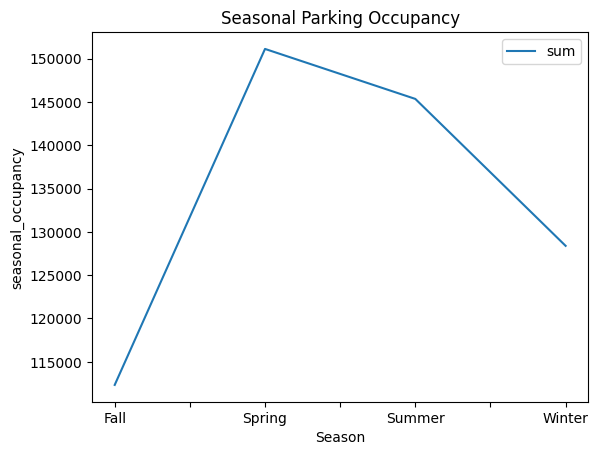

In [ ]:
# Aggregate the data by season.
seasonal_occupancy = dataq.groupby("season")["VehiclePresent"].agg(["sum"])

# Plot the seasonal occupancy data.
fig, ax = plt.subplots()

seasonal_occupancy.plot(ax=ax)

ax.set_title("Seasonal Parking Occupancy")
ax.set_xlabel("Season")
ax.set_ylabel("seasonal_occupancy")

plt.show()

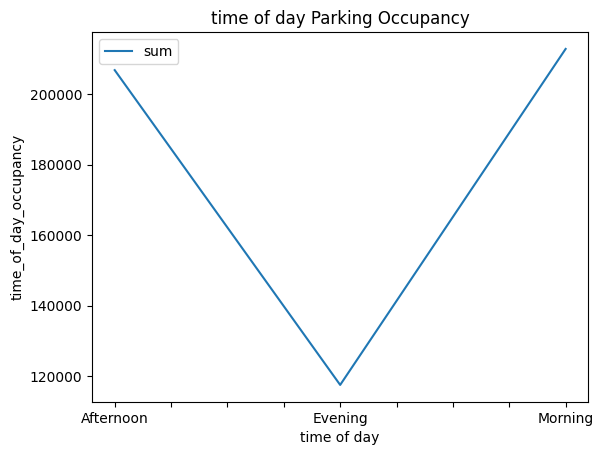

In [ ]:
# Aggregate the data by time of day .
time_of_day_occupancy = dataq.groupby("time_of_day")["VehiclePresent"].agg(["sum"])

# Plot the time of day occupancy data.
fig, ax = plt.subplots()

time_of_day_occupancy.plot(ax=ax)

ax.set_title("time of day Parking Occupancy")
ax.set_xlabel("time of day")
ax.set_ylabel("time_of_day_occupancy")

plt.show()

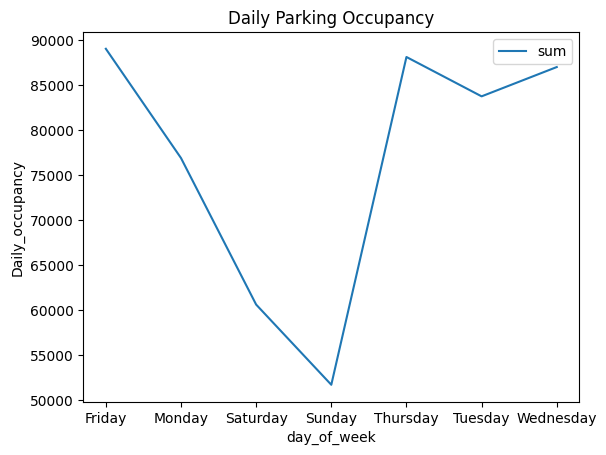

In [ ]:

# Aggregate the data by day.
Daily_occupancy = dataq.groupby("day_of_week")["VehiclePresent"].agg(["sum"])

# Plot the Daily occupancy data.
fig, ax = plt.subplots()

Daily_occupancy.plot(ax=ax)

ax.set_title("Daily Parking Occupancy")
ax.set_xlabel("day_of_week")
ax.set_ylabel("Daily_occupancy")

plt.show()

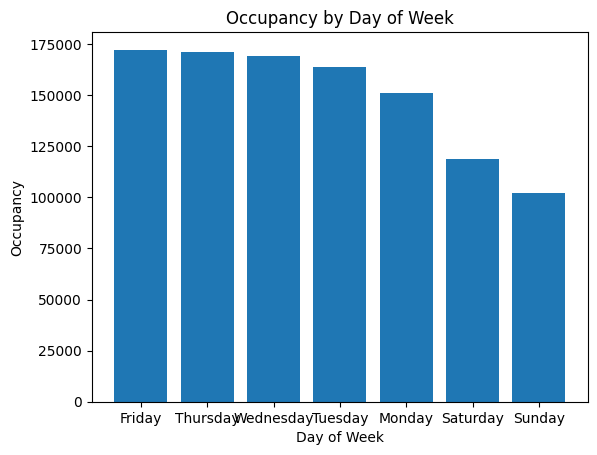

In [ ]:
import matplotlib.pyplot as plt

# Get the number of parking events on each day of the week.
day_of_week_counts = dataq["day_of_week"].value_counts()

# Create a bar plot of the day_of_week_counts data.
plt.bar(day_of_week_counts.index, day_of_week_counts.values)

# Add a title to the plot.
plt.title("Occupancy by Day of Week")

# Add labels to the x-axis.
plt.xlabel("Day of Week")

# Add labels to the y-axis.
plt.ylabel("Occupancy")

# Show the plot.
plt.show()


In [ ]:
dataq.head(1)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True,2,...,29,45,52,46,Friday,Weekday,19,Evening,Winter,0


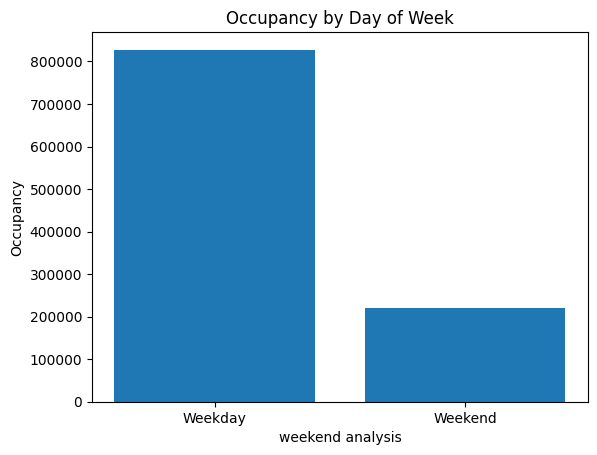

In [ ]:
import matplotlib.pyplot as plt

# Get the number of parking events on each day of the week.
weekend_counts = dataq["day_type"].value_counts()

# Create a bar plot of the day_of_week_counts data.
plt.bar(weekend_counts.index, weekend_counts.values)

# Add a title to the plot.
plt.title("Occupancy by Day of Week")

# Add labels to the x-axis.
plt.xlabel("weekend analysis")

# Add labels to the y-axis.
plt.ylabel("Occupancy")

# Show the plot.
plt.show()


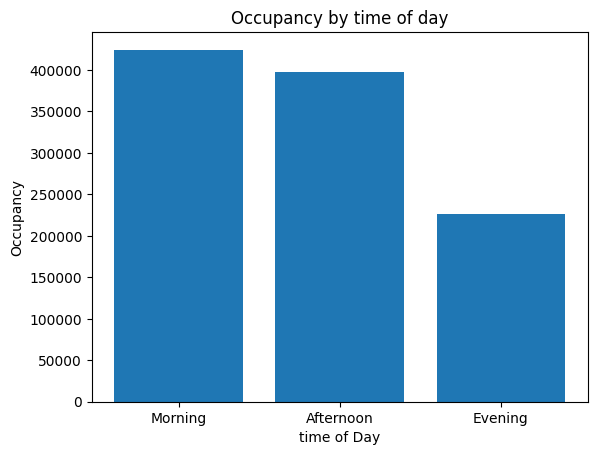

In [ ]:
import matplotlib.pyplot as plt

# Get the number of parking events on each day of the week.
daily_counts = dataq["time_of_day"].value_counts()

# Create a bar plot of the day_of_week_counts data.
plt.bar(daily_counts.index, daily_counts.values)

# Add a title to the plot.
plt.title("Occupancy by time of day")

# Add labels to the x-axis.
plt.xlabel("time of Day")

# Add labels to the y-axis.
plt.ylabel("Occupancy")

# Show the plot.
plt.show()


In [ ]:
dataq.tail(1)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
1048574,17418,2019-05-25 18:10:25,2019-05-25 18:18:14,8,Docklands,VILLAGE STREET,6320,False,True,5,...,25,10,14,18,Saturday,Weekend,18,Evening,Spring,0


public_holiday
0    0.512394
1    0.506526
Name: VehiclePresent, dtype: float64


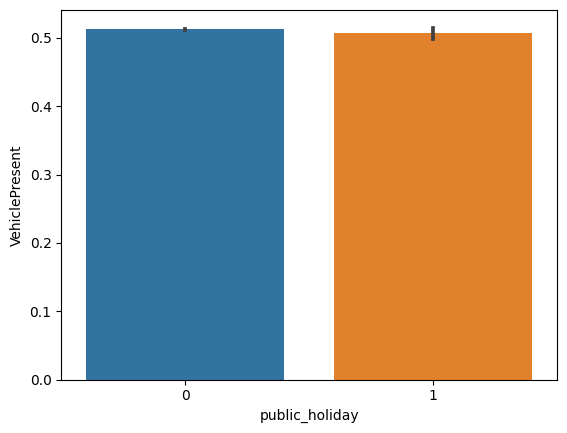

In [ ]:
# Group the data by the public holiday column and calculate the average parking
parking_by_holiday = dataq.groupby('public_holiday')['VehiclePresent'].mean()
print(parking_by_holiday)

# Visualize the average parking for holidays and non-holidays
sns.barplot(x='public_holiday', y='VehiclePresent', data=dataq)
plt.show()


0    1035474
1      13101
Name: public_holiday, dtype: int64


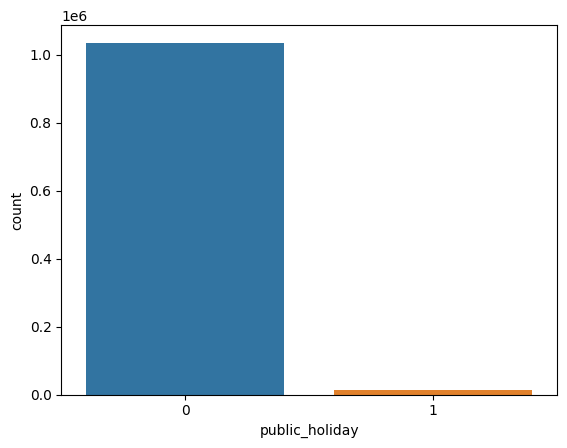

In [ ]:
# Count the number of holidays and non-holidays
print(dataq['public_holiday'].value_counts())

# Visualize the distribution of holidays and non-holidays
sns.countplot(x='public_holiday', data=dataq)
plt.show()

##In-depth exploration using SQL

In [37]:
!pip install pandas
!pip install sqlalchemy


In [38]:
import sqlite3
from sqlalchemy import create_engine

# connect to the database
conn = sqlite3.connect('example.db')

# create engine
engine = create_engine('sqlite:///example.db')


In [39]:
#load the sql into our  environment
%load_ext sql

In [40]:
#connect to our memory sqlite database
%sql sqlite://

In [41]:
#we first convert our database into csv so that we can run in the  sql environment
# converting to CSV file
dataq3=dataq.to_csv('raw_data.csv', index=False)

In [42]:
#importimg our libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
%matplotlib inline

In [43]:
!add-apt-repository -y ppa:sergey-dryabzhinsky/packages
!apt update
!apt install sqlite3

Repository: 'deb https://ppa.launchpadcontent.net/sergey-dryabzhinsky/packages/ubuntu/ jammy main'
Description:
Some packages that absent in main Ubuntu repos or backported:
- opensslXXXr - for php-mod-openssl different versions
- libvpx1 (xenial) - for php-5.4
- mysql-5.5 (xenial) - libmysqlclient16 for php 4.4-5.4
- pcre3 - for php, build without stack recursion
- geoip-database - full set of latest GeoIP-lite v1 databases

== Attention! ==

@2022-05-18
Soon most of backported libraries will be moved to `backports` ppa.
And this and other PPAs will depend on `backports`.

@2019-05-28
Updated symbols in libssl102r!
Dependant packages may fail to run!
Wait till these packages will be rebuilded: php54, php55, php56, php-mod-mongodb, php7-mod-stomp.

@2019-05
Precise packages removed.

@2017-05
Beware! Precise is obsolete and packages will not be updated!
For Precise packages follow https://dryabzhinsky.noip.me/packages/

@2015-05
Beware! Lucid is obsolete and packages will not be update

In [44]:
import sqlite3
print(sqlite3.sqlite_version) # 3.33.0

3.37.2


In [45]:
import sqlite3

# Read data into pandas DataFrame
with open('raw_data.csv', 'r') as f:
    data = pd.read_csv(f, index_col=0, encoding='utf-8')

# Create connection to SQLite database
conn= sqlite3.connect('mydatabase.db')

# Write DataFrame to SQLite database
data.to_sql('mytable', conn)

# Query data from SQLite database using SQL
sql_query = """
SELECT * FROM mytable LIMIT 5;
"""

result = pd.read_sql_query(sql_query, conn)

# Close connection to SQLite database
conn.close()

# Show the result
result.head()


,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,0,1,2,...,29,45,52,46,Friday,Weekday,19,Evening,Winter,0
1,17176,2019-03-25 20:35:40,2019-03-25 20:39:08,4,Docklands,COLLINS STREET,6005,0,1,3,...,40,35,8,39,Monday,Weekday,20,Evening,Spring,0
2,17176,2019-01-17 05:28:55,2019-01-17 06:57:09,89,Docklands,COLLINS STREET,6005,0,1,1,...,55,28,9,57,Thursday,Weekday,5,Morning,Winter,0
3,17176,2019-03-13 22:18:17,2019-03-13 22:18:24,0,Docklands,COLLINS STREET,6005,0,0,3,...,17,18,24,18,Wednesday,Weekday,22,Evening,Spring,0
4,17176,2019-01-18 06:04:37,2019-01-18 06:07:29,3,Docklands,COLLINS STREET,6005,0,1,1,...,37,4,29,7,Friday,Weekday,6,Morning,Winter,0


In [46]:
#we try and get the number of parking stations serving melnbourne city we can also determine if we will use a single or a multi server queue system
#Query data from SQLite database using SQL

sql_query = """
SELECT COUNT( DISTINCT DeviceId ) AS "Number of melb servers" from mytable;
"""
# Create connection to SQLite database
conn1 = sqlite3.connect('mydatabase.db')

result1 = pd.read_sql_query(sql_query, conn1)

# Show the result
result1.head()

,Number of melb servers
0,1144


In [47]:
#We first get the total tarnsactions this also transalates to number of customers served our devices have
# Create  another to use connection to SQLite database
conn1 = sqlite3.connect('mydatabase.db')

# Query data from SQLite database using SQL
sql_query = """
SELECT COUNT(DeviceId) AS "Number of melb customers"  FROM mytable;
"""

result3 = pd.read_sql_query(sql_query, conn1)


# Show the result
result3.head()

,Number of melb customers
0,1048575


In [48]:
#we try and get the number of areanames that melbourne parking service facilaitates
# Create connection to SQLite database
conn1 = sqlite3.connect('mydatabase.db')
# Query data from SQLite database using SQL
sql_query = """
SELECT COUNT( DISTINCT AreaName ) AS "Number of Areanames" FROM mytable;
"""
result4= pd.read_sql_query(sql_query, conn1)
# Show the result
result4.head()

,Number of Areanames
0,36


In [49]:
#we try and get the number of streetnames that melbourne parking service facilaitates
# Query data from SQLite database using SQL
sql_query = """
SELECT COUNT( DISTINCT StreetName ) AS "streets of melbourne" FROM mytable;
"""
result5= pd.read_sql_query(sql_query, conn1)
# Show the result
result5.head()

,streets of melbourne
0,98


In [50]:
#we try and get the number of parking vacancies available at  melbourne parking service facilaitates
# Query data from SQLite database using SQL
sql_query = """
SELECT DeviceId,StreetName,AreaName,
COUNT(*) as total_parkings_per_area FROM mytable GROUP BY AreaName ORDER BY total_parkings_per_area DESC LIMIT 18;
"""
result6= pd.read_sql_query(sql_query, conn1)
# Show the result
result6

,DeviceId,StreetName,AreaName,total_parkings_per_area
0,17176,COLLINS STREET,Docklands,1047370
1,26280,HOWARD STREET,Queensberry,116
2,27187,ALBERT STREET,Jolimont,72
3,25309,VICTORIA PARADE,All,67
4,25221,QUEEN STREET,Titles,64
5,26519,EXHIBITION STREET,Regency,59
6,26225,LONSDALE STREET,County,55
7,12211,DORCAS STREET,Southbank,54
8,27058,LONSDALE STREET,Princes Theatre,53
9,26650,KING STREET,Rialto,48


In [51]:
#we also check which device has been used the most in each area and  docklands server 17418 seems to take the fair share of the transactions
sql_query = """

SELECT DeviceId,StreetName,AreaName,ArrivalTime, COUNT(*) as transactions_per_area FROM mytable GROUP BY AreaName ORDER BY transactions_per_area desc LIMIT 18;
"""
result7= pd.read_sql_query(sql_query, conn1)
# Show the result
result7.head()


,DeviceId,StreetName,AreaName,ArrivalTime,transactions_per_area
0,17176,COLLINS STREET,Docklands,2019-02-15 19:45:29,1047370
1,26280,HOWARD STREET,Queensberry,2019-03-05 07:30:00,116
2,27187,ALBERT STREET,Jolimont,2019-09-18 19:43:10,72
3,25309,VICTORIA PARADE,All,2019-03-13 08:34:48,67
4,25221,QUEEN STREET,Titles,2019-05-19 12:05:07,64


In [52]:
#we go ahead and determine number of servers in docklands
#we then get the how many servers docklands has and it has 228
sql_query = """
SELECT COUNT( DISTINCT DeviceId ) AS "Number of docks servers" from mytable
WHERE AreaName="Docklands";
"""
# Create connection to SQLite database
conn1 = sqlite3.connect('mydatabase.db')

result7b = pd.read_sql_query(sql_query, conn1)

# Show the result
result7b.head()

,Number of docks servers
0,228


In [53]:
#we also go ahead and get the number of transactions/customers
#docklands has over 95% of transactions in our database
# Query data from SQLite database using SQL
sql_query = """
SELECT COUNT(DeviceId) AS "Number of dock customers"  FROM mytable
WHERE AreaName="Docklands";
"""
result7c = pd.read_sql_query(sql_query, conn1)
# Show the result
result7c.head()

,Number of dock customers
0,1047370


In [54]:
#we can also try and get the average parking time on collins streeet
sql_query = """

SELECT AVG(DurationMinutes ) AS "Average parking time in docklands" FROM mytable
WHERE AreaName="Docklands";

"""
result8= pd.read_sql_query(sql_query, conn1)
# Show the result
result8.head()

,Average parking time in docklands
0,47.990664


In [55]:
#we then check which areanames have high duration periods

sql_query = """
SELECT 	DeviceId,AreaName,COUNT(DISTINCT DurationMinutes)  as duration FROM mytable
GROUP BY AreaName
ORDER BY 	duration DESC
LIMIT 10;

"""
result9= pd.read_sql_query(sql_query, conn1)
# Show the result
result9.head()

,DeviceId,AreaName,duration
0,17176,Docklands,999
1,26280,Queensberry,68
2,27187,Jolimont,41
3,25221,Titles,38
4,25309,All,36


In [56]:
#we then check which areanames have low duration periods

sql_query = """
SELECT 	DeviceId,AreaName,COUNT(DISTINCT DurationMinutes)  as duration FROM mytable
GROUP BY AreaName
ORDER BY 	duration ASC
LIMIT 10;

"""

result10= pd.read_sql_query(sql_query, conn1)
# Show the result
result10.head()

,DeviceId,AreaName,duration
0,28421,None,1
1,27868,Domain,5
2,26586,Drummond,6
3,18555,Degraves,7
4,27152,Tavistock,8


In [57]:
#we explore docklands futrther cause it is biased  and has 99% of the transactions we first  explore the number of stations in each area and dockalnads has most stations 228
sql_query = """


SELECT DeviceId,AreaName,DurationMinutes,VehiclePresent,Month,Day,hourarrive
FROM mytable
WHERE AreaName ='Docklands';

"""

result11= pd.read_sql_query(sql_query, conn1)
# Show the result
result11.head()


,DeviceId,AreaName,DurationMinutes,VehiclePresent,Month,Day,hourarrive
0,17176,Docklands,1,1,2,15,19
1,17176,Docklands,4,1,3,25,20
2,17176,Docklands,89,1,1,17,5
3,17176,Docklands,0,0,3,13,22
4,17176,Docklands,3,1,1,18,6


In [58]:
#we explore docklands futrther cause it is biased  and has 99% of the transactions we first  explore the number
# servers that are busiest and are in which streets
sql_query = """

SELECT StreetName,DeviceId, COUNT(*) FROM mytable
GROUP BY DeviceId
ORDER BY 3 desc
LIMIT 18;

"""

result12= pd.read_sql_query(sql_query, conn1)
# Show the result
result12.head()

,StreetName,DeviceId,COUNT(*)
0,COLLINS STREET,17195,32179
1,MERCHANT STREET,17404,21002
2,HARBOUR ESPLANADE,17365,20667
3,BOURKE STREET,17264,19443
4,SEAFARER LANE,17350,17790


In [59]:
#we explore docklands futrther cause it is biased  and has 99% of the transactions we first  explore the
#servers that are least busiest
sql_query = """

SELECT StreetName, COUNT(*) FROM mytable
GROUP BY DeviceId
ORDER BY 2 asc
LIMIT 18;

"""

result12v= pd.read_sql_query(sql_query, conn1)
# Show the result
result12v.head()

,StreetName,COUNT(*)
0,LITTLE LONSDALE STREET,1
1,COLLINS STREET,1
2,AQUITANIA WAY,1
3,KING STREET,1
4,KING STREET,1


In [60]:
#we check which street has the highest number of duration minutes seems it is collins street
sql_query = """

SELECT *
FROM mytable
ORDER BY DurationMinutes desc
LIMIT 20;

"""

result14= pd.read_sql_query(sql_query, conn1)
# Show the result
result14.head()

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17177,2019-10-26 00:00:00,2019-10-27 00:00:00,1440,Docklands,COLLINS STREET,6045,1,1,10,...,0,0,0,0,Saturday,Weekend,0,Morning,Fall,0
1,17177,2019-02-17 00:00:00,2019-02-18 00:00:00,1440,Docklands,COLLINS STREET,6045,0,0,2,...,0,0,0,0,Sunday,Weekend,0,Morning,Winter,0
2,17177,2019-10-25 00:00:00,2019-10-26 00:00:00,1440,Docklands,COLLINS STREET,6045,1,1,10,...,0,0,0,0,Friday,Weekday,0,Morning,Fall,0
3,17177,2019-12-25 00:00:00,2019-12-26 00:00:00,1440,Docklands,COLLINS STREET,6045,0,0,12,...,0,0,0,0,Wednesday,Weekday,0,Morning,Winter,1
4,17177,2019-10-23 00:00:00,2019-10-24 00:00:00,1440,Docklands,COLLINS STREET,6045,1,1,10,...,0,0,0,0,Wednesday,Weekday,0,Morning,Fall,0


In [61]:
# We check specifically the server with most transactions in docklands
#sever 17195 we discover that its in COLLIN street with bayid=6005
sql_query = """

SELECT *
FROM mytable
WHERE DeviceId ="17195"
ORDER BY 3 DESC
LIMIT 10;

"""
result15= pd.read_sql_query(sql_query, conn1)
# Show the result
result15.head()

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17195,2019-12-31 21:14:57,2019-12-31 21:17:16,3,Docklands,COLLINS STREET,6016,0,0,12,...,57,14,16,17,Tuesday,Weekday,21,Evening,Winter,0
1,17195,2019-12-31 21:08:50,2019-12-31 21:14:57,6,Docklands,COLLINS STREET,6016,0,1,12,...,50,8,57,14,Tuesday,Weekday,21,Evening,Winter,0
2,17195,2019-12-31 20:48:36,2019-12-31 21:08:50,20,Docklands,COLLINS STREET,6016,0,0,12,...,36,48,50,8,Tuesday,Weekday,20,Evening,Winter,0
3,17195,2019-12-31 20:32:46,2019-12-31 20:48:36,16,Docklands,COLLINS STREET,6016,0,1,12,...,46,32,36,48,Tuesday,Weekday,20,Evening,Winter,0
4,17195,2019-12-31 20:24:05,2019-12-31 20:32:46,8,Docklands,COLLINS STREET,6016,0,0,12,...,5,24,46,32,Tuesday,Weekday,20,Evening,Winter,0


In [62]:
#we go ahead and investigate the streetnames in docklands that have duration times of more than 1000 and has a vehicle present
#Most vehicles that have the longest duration are packed at midnight
#colllins street seems to be most affected
#and most vehicles are parked in the month of october
sql_query = """

SELECT DeviceId,ArrivalTime,DurationMinutes,AreaName,StreetName,VehiclePresent
FROM mytable
WHERE DurationMinutes >"1000" AND VehiclePresent="1"
ORDER BY 3 desc
LIMIT 10;


"""
result17= pd.read_sql_query(sql_query, conn1)
# Show the result
result17.head()


,DeviceId,ArrivalTime,DurationMinutes,AreaName,StreetName,VehiclePresent
0,17177,2019-10-26 00:00:00,1440,Docklands,COLLINS STREET,1
1,17177,2019-10-25 00:00:00,1440,Docklands,COLLINS STREET,1
2,17177,2019-10-23 00:00:00,1440,Docklands,COLLINS STREET,1
3,17177,2019-10-24 00:00:00,1440,Docklands,COLLINS STREET,1
4,17177,2019-10-27 00:00:00,1440,Docklands,COLLINS STREET,1


In [63]:
#we try and get the number of parking bays on collins street
sql_query = """

SELECT COUNT( DISTINCT BayID ) AS "Number of bays in collins" FROM mytable
WHERE StreetName="COLLINS STREET";

"""
result18= pd.read_sql_query(sql_query, conn1)
# Show the result
result18.head()

,Number of bays in collins
0,63


In [64]:
#we go ahead and investigate collins street
sql_query = """

SELECT *
FROM mytable
WHERE StreetName="COLLINS STREET"
ORDER BY 3 DESC
LIMIT 10;

"""
result19= pd.read_sql_query(sql_query, conn1)
# Show the result
result19.head()

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17177,2019-12-31 23:29:48,2019-12-31 23:29:59,0,Docklands,COLLINS STREET,6045,0,0,12,...,48,29,59,29,Tuesday,Weekday,23,Evening,Winter,0
1,17177,2019-12-31 23:29:27,2019-12-31 23:29:48,0,Docklands,COLLINS STREET,6045,0,1,12,...,27,29,48,29,Tuesday,Weekday,23,Evening,Winter,0
2,17177,2019-12-31 23:29:21,2019-12-31 23:29:27,0,Docklands,COLLINS STREET,6045,0,0,12,...,21,29,27,29,Tuesday,Weekday,23,Evening,Winter,0
3,17177,2019-12-31 23:29:04,2019-12-31 23:29:21,0,Docklands,COLLINS STREET,6045,0,1,12,...,4,29,21,29,Tuesday,Weekday,23,Evening,Winter,0
4,17177,2019-12-31 23:27:15,2019-12-31 23:29:04,2,Docklands,COLLINS STREET,6045,0,0,12,...,15,27,4,29,Tuesday,Weekday,23,Evening,Winter,0


In [65]:
#we can also try and get number of servers serving collins street
sql_query = """

SELECT COUNT( DISTINCT DeviceId ) AS "Number of servers in collins" FROM mytable
WHERE StreetName="COLLINS STREET";

"""
result20= pd.read_sql_query(sql_query, conn1)
# Show the result
result20.head()

,Number of servers in collins
0,74


In [66]:
#we can also try and get the average parking time on collins streeet
sql_query = """

SELECT AVG(DurationMinutes ) AS "Average parking time in collins" FROM mytable
WHERE StreetName="COLLINS STREET";

"""
result21= pd.read_sql_query(sql_query, conn1)
# Show the result
result21.head()

,Average parking time in collins
0,40.606622


In [67]:
#we can do the same for village street which holds the server with highest number of transactions
sql_query = """

SELECT COUNT( DISTINCT BayID ) AS "Number of bays in village" FROM mytable
WHERE StreetName="VILLAGE STREET";

"""
result22= pd.read_sql_query(sql_query, conn1)
# Show the result
result22.head()

,Number of bays in village
0,9


In [68]:
#we can also try and get the average parking time on village street streeet
sql_query = """

SELECT AVG(DurationMinutes ) AS "Average parking time in village" FROM mytable
WHERE StreetName="VILLAGE STREET";

"""
result23= pd.read_sql_query(sql_query, conn1)
# Show the result
result23.head()

,Average parking time in village
0,56.626697


From the above its an indication that we our model can only follow multiserver model queing system since most most the cars(90& and above) the parking station in the docklands.
Multiserver queue system must hab other characteristics

 All the parking stations are assumed to work at the identical capacity.

*   The arrival of cars follows the poisson distribution

*   Parking stations service follows the exponential distribution.

*  All the parking stations are assumed to work at the identical capacity.


##Weather Api Request

In [ ]:
import requests

# Replace 'YOUR_API_KEY' with the actual API key you obtained from Tomorrow.io
api_key = 'https://api.tomorrow.io/v4/timelines?location=40.75872069597532,-73.98529171943665&fields=temperature&timesteps=1h&units=metric&apikey=JCJE2C9d9eLQJyBcSvO8HkOTi0YwjtgC'

In [ ]:
# Define your secret key
secret_key = 'JCJE2C9d9eLQJyBcSvO8HkOTi0YwjtgC'  # Replace with your actual secret key

In [ ]:
# Set up the headers with the secret key
headers = {
    'Authorization': f'Secret {secret_key}'
}

# Make the API request
response = requests.get(url, headers=headers)

# Process the response as needed


In [ ]:
# Set the location, start date, and end date
location = 'Melbourne'
start_date = '2019-01-01T00:00:00Z'  # Start of the year
end_date = '2019-12-31T23:59:59Z'    # End of the year

In [ ]:
# Make the API request
url = f'https://api.tomorrow.io/v4/timelines?location={location}&start_time={start_date}&end_time={end_date}&fields=temperature_2m,humidity_2m&apikey={api_key}'
response = requests.get(url)
dataw = response.json()

In [ ]:
print(dataw)

{'code': 401001, 'type': 'Invalid Auth', 'message': 'The method requires authentication but it was not presented or is invalid.'}


In [ ]:
# Accessing specific values in the dictionary
temperature = dataw['data']['timelines'][0]['intervals'][0]['values']['temperature_2m']
humidity = dataw['data']['timelines'][0]['intervals'][0]['values']['humidity_2m']

KeyError: ignored

In [ ]:


# Or, if you want to convert it to a DataFrame
import pandas as pd

# Assuming dataw is in a format where intervals is a list of dictionaries
df = pd.DataFrame(dataw['data']['timelines'][0]['intervals'])

# Now you can use df.head(1) to view the first row


In [ ]:
# Extract temperature and humidity data
humidity = dataw['data']['timelines'][0]['intervals']
humidity_data = [entry['values']['humidity_2m'] for entry in humidity]

KeyError: ignored

In [ ]:
# Extract temperature and humidity data
temperature = dataw['dataw']['timelines'][0]['intervals']
temperature_data = [entry['values']['temperature_2m'] for entry in temperature]



KeyError: ignored

In [ ]:








# Print the data (for example, printing the first 5 entries)
print(f'Temperature (°C): {temperature_data[:5]}')
print(f'Humidity (%): {humidity_data[:5]}')


##Data Analysis

### Analysing vehicle presence by:
*  weekend/weekday
*  day of the week
*  time of day
*  season of the year
*  Public holidays


vehicle present indicates whether a car is present or not we first analyse car presence analysis and percentage

In [86]:
import pandas as pd

# Load parking data into a DataFrame
data = dataq
# Analyze the column indicating car presence
car_presence_counts = data["VehiclePresent"].value_counts()

# Calculate car presence percentage
car_presence_percentage = car_presence_counts / len(data) * 100

# Print the analysis results
print("Car Presence Analysis:")
print(car_presence_counts)
print("\nCar Presence Percentage:")
print(car_presence_percentage)


Car Presence Analysis:
True     537207
False    511368
Name: VehiclePresent, dtype: int64

Car Presence Percentage:
True     51.232101
False    48.767899
Name: VehiclePresent, dtype: float64


In [87]:
dataq.head(2)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True,2,...,29,45,52,46,Friday,Weekday,19,Evening,Winter,0
1,17176,2019-03-25 20:35:40,2019-03-25 20:39:08,4,Docklands,COLLINS STREET,6005,False,True,3,...,40,35,8,39,Monday,Weekday,20,Evening,Spring,0


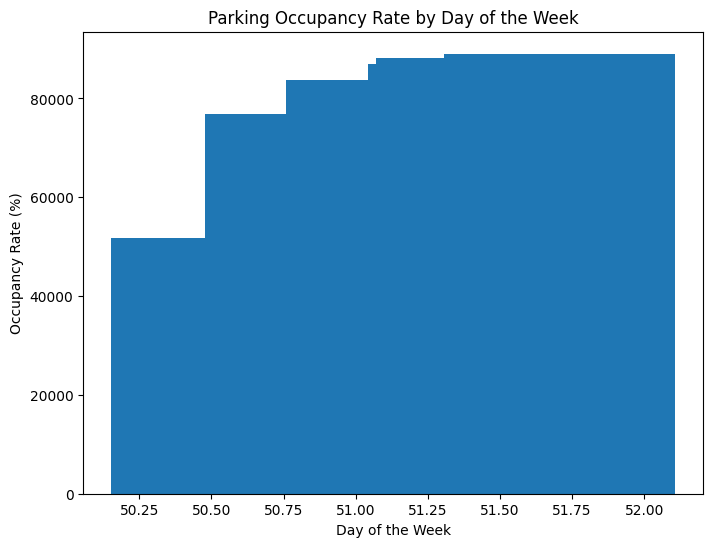

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate occupancy rate by day of the week
occupancy_rate_by_day = dataq.groupby('day_of_week')['VehiclePresent'].mean() * 100

# Calculate the number of vehicles parked by day of the week
vehicle_count_by_day = dataq.groupby('day_of_week')['VehiclePresent'].sum()

# Define the day labels
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting occupancy rate
plt.figure(figsize=(8,6))
plt.bar(occupancy_rate_by_day,vehicle_count_by_day)
plt.xlabel('Day of the Week')
plt.ylabel('Occupancy Rate (%)')
plt.title('Parking Occupancy Rate by Day of the Week')
plt.show()


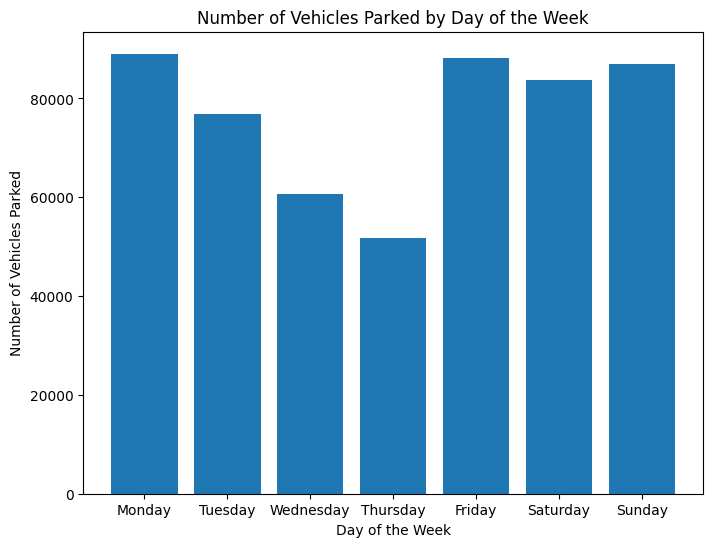

In [89]:
# Plotting the number of vehicles parked
plt.figure(figsize=(8,6))
plt.bar(day_labels, vehicle_count_by_day)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Vehicles Parked')
plt.title('Number of Vehicles Parked by Day of the Week')
plt.show()


In [90]:
dataq.head(1)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True,2,...,29,45,52,46,Friday,Weekday,19,Evening,Winter,0


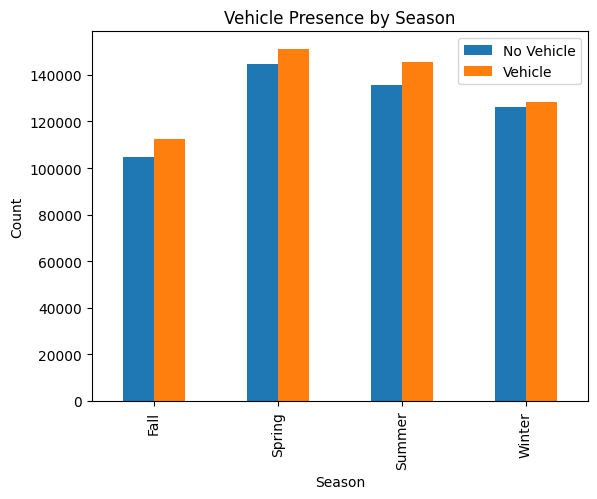

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a grouped DataFrame
grouped_data = dataq.groupby(['season', 'VehiclePresent']).size().unstack()

# Plotting a grouped bar chart
grouped_data.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Vehicle Presence by Season')
plt.legend(['No Vehicle', 'Vehicle'])
plt.show()


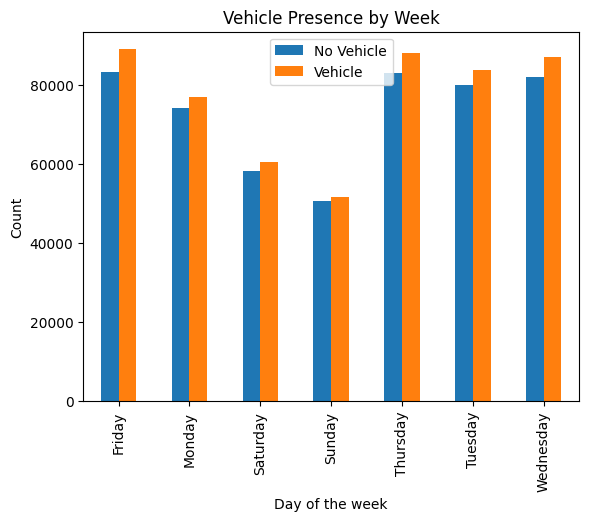

In [92]:

import pandas as pd
import matplotlib.pyplot as plt

# Create a grouped DataFrame
grouped_data2 = dataq.groupby(['day_of_week','VehiclePresent']).size().unstack()

# Plotting a grouped bar chart
grouped_data2.plot(kind='bar')
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.title('Vehicle Presence by Week')
plt.legend(['No Vehicle', 'Vehicle'])
plt.show()


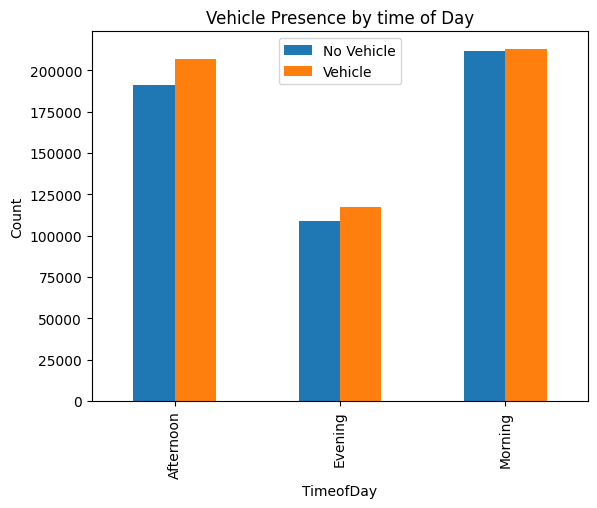

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a grouped DataFrame
grouped_data3 = dataq.groupby(['time_of_day','VehiclePresent']).size().unstack()

# Plotting a grouped bar chart
grouped_data3.plot(kind='bar')
plt.xlabel('TimeofDay')
plt.ylabel('Count')
plt.title('Vehicle Presence by time of Day')
plt.legend(['No Vehicle', 'Vehicle'])
plt.show()


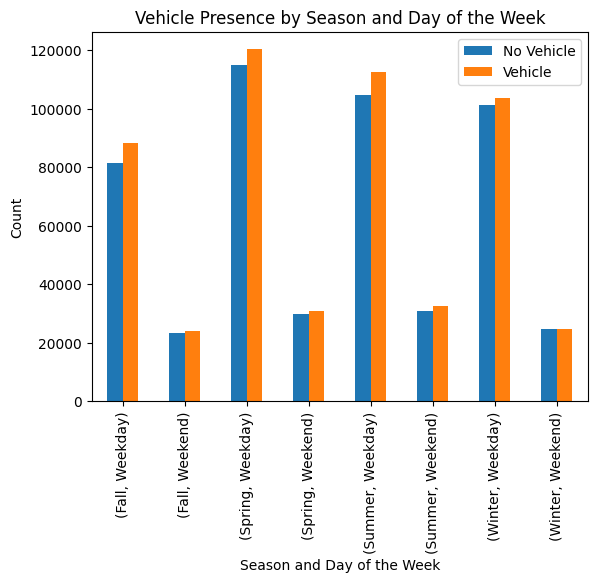

In [94]:
# Create a grouped DataFrame with multiple categories
grouped_data4 = dataq.groupby(['season', 'day_type', 'VehiclePresent']).size().unstack()

# Plotting a grouped bar chart with multiple categories
grouped_data4.plot(kind='bar')
plt.xlabel('Season and Day of the Week')
plt.ylabel('Count')
plt.title('Vehicle Presence by Season and Day of the Week')
plt.legend(['No Vehicle', 'Vehicle'])
plt.show()


### Analyzing parking duration by:

*  weekend/weekday
*  day of the week
*  time of day
*  season of the year
*  Public holidays



In [ ]:
dataq.head(1)

In [ ]:
import matplotlib.pyplot as plt
occupancy_by_time = dataq.groupby('time_of_day')['DurationMinutes'].mean()
# Plotting occupancy by the time of day
occupancy_by_time.plot(kind='bar')
plt.xlabel('Time of the day')
plt.ylabel('Average Duration')
plt.title('Parking Occupancy by the time of day')
plt.show()


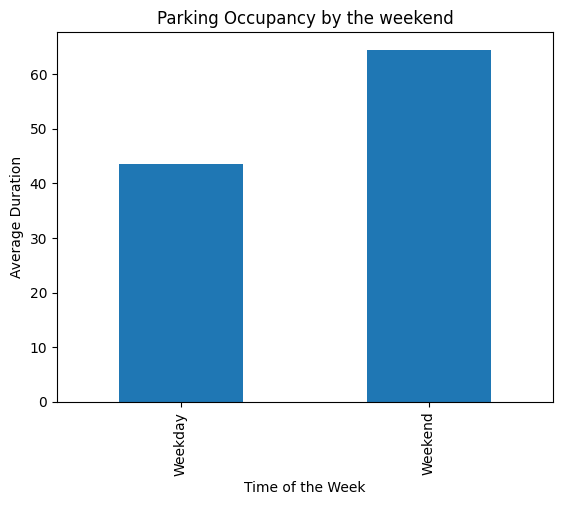

In [ ]:
import matplotlib.pyplot as plt
occupancy_by_weekend = dataq.groupby('day_type')['DurationMinutes'].mean()
# Plotting occupancy by the weekend
occupancy_by_weekend.plot(kind='bar')
plt.xlabel('Time of the Week')
plt.ylabel('Average Duration')
plt.title('Parking Occupancy by the weekend')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
occupancy_by_week = dataq.groupby('day_of_week')['DurationMinutes'].mean()
# Plotting occupancy by day of the week
occupancy_by_week.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Duration')
plt.title('Parking Occupancy by day of the week')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
occupancy_by_season = dataq.groupby('season')['DurationMinutes'].mean()
# Plotting occupancy by season of the month
occupancy_by_season.plot(kind='bar')
plt.xlabel('Season of the Year')
plt.ylabel('Average Duration')
plt.title('Parking Occupancy by season of the Year')
plt.show()


In [ ]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#Pivot the data to create a matrix where each row represents a day
#each column represents an hour, and the values represent the parking occupancy:
pivot_data = dataq.pivot_table(index="Month", columns="arrival_hour", values="VehiclePresent", aggfunc=np.mean)

In [ ]:
#Perform clustering on the pivot data. Set the number of clusters and fit the K-means clustering algorithm:
num_clusters = 4  # Choose the appropriate number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(pivot_data.values)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


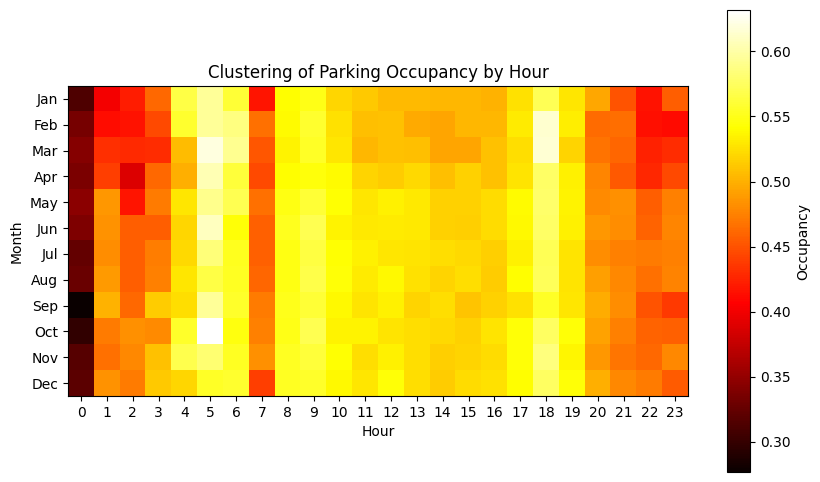

In [ ]:
#Plot the clustering results using a heatmap:
plt.figure(figsize=(10, 6))
plt.imshow(pivot_data.values, cmap="hot")
plt.colorbar(label="Occupancy")
plt.xticks(np.arange(24), np.arange(24))
plt.yticks(np.arange(12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Hour")
plt.ylabel("Month")
plt.title("Clustering of Parking Occupancy by Hour")
plt.show()

we have generated a heatmap plot where each cell represents the average parking occupancy for a specific hour in a specific month. The color intensity represents the occupancy level, and the clustering analysis is reflected in the patterns and clusters observed in the heatmap.

weekly aps curve plot

In [ ]:
#import important libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Extract the day of the week from the "timestamp" column and calculate the average occupancy for each day of the week:
data["day_of_week"] = dataq["ArrivalTime"].dt.day_of_week
weekly_occupancy = data.groupby("day_of_week")["VehiclePresent"].mean()


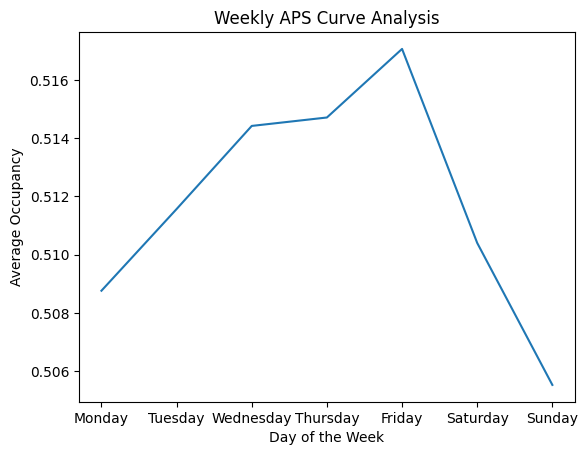

In [ ]:
#Create a weekly APS curve plot:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.plot(weekdays, weekly_occupancy)
plt.xlabel("Day of the Week")
plt.ylabel("Average Occupancy")
plt.title("Weekly APS Curve Analysis")
plt.show()


Create a bar plot to visualize the car presence for different days:

In [ ]:
#Group the data by month and calculate the car presence counts for each month
car_daily_counts = dataq.groupby("day_of_week")["VehiclePresent"].sum()

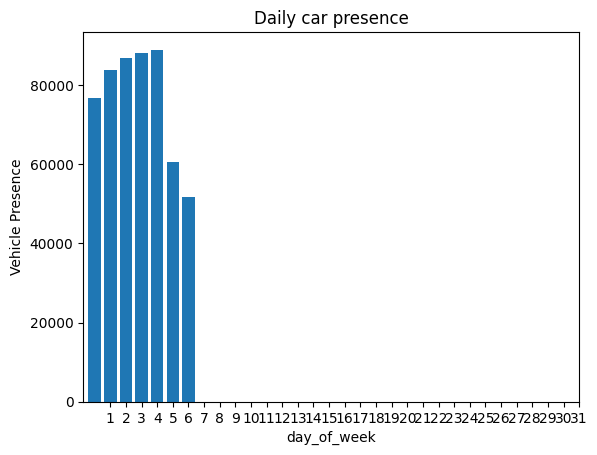

In [ ]:
#Create a bar plot to visualize the car presence for different months
plt.bar(car_daily_counts.index, car_daily_counts.values)
plt.xlabel("day_of_week")
plt.ylabel("Vehicle Presence")
plt.title("Daily car presence")
plt.xticks(range(1, 32))  # Assuming the days are represented by numbers 1-31
plt.show()

Create a bar plot to visualize the car presence for different days:


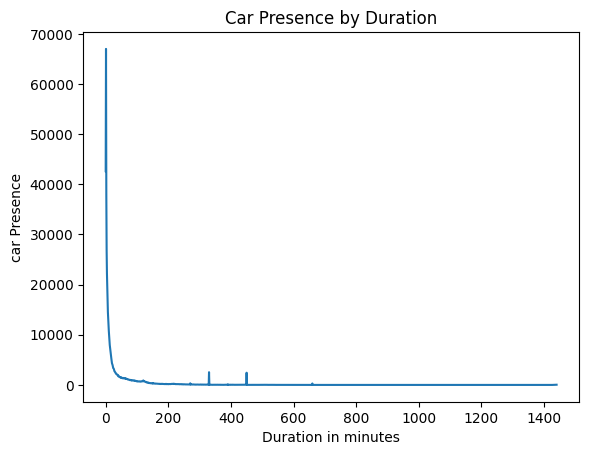

In [ ]:
#Group the data by duration and calculate the car presence counts for each duration:
car_presence_count3 = dataq.groupby("DurationMinutes")["VehiclePresent"].sum()
#Create a line plot to visualize the car presence for different duration times
plt.plot(car_presence_count3.index, car_presence_count3.values)
plt.xlabel("Duration in minutes")
plt.ylabel("car Presence")
plt.title("Car Presence by Duration")
plt.show()

daily and weekly occupancy rate

In [ ]:
#Extract the week of the year and hour of the day from the "timestamp" column:
data["week_of_year"] = dataq["ArrivalTime"].dt.week
data["hour_of_day"] = dataq["ArrivalTime"].dt.hour


<ipython-input-135-c5f901e110f8>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data["week_of_year"] = dataq["ArrivalTime"].dt.week


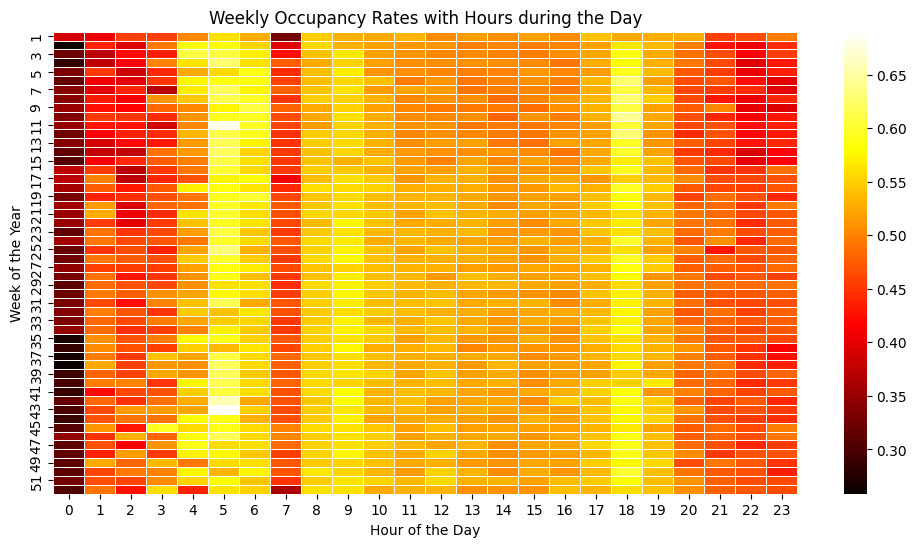

In [ ]:
#Calculate the average occupancy for each week of the year and hour of the day:
weekly_hourly_occupancy = dataq.groupby(["week_of_year", "hour_of_day"])["VehiclePresent"].mean().unstack()
#Create a heatmap to visualize the weekly occupancy rates with hours during the day:
plt.figure(figsize=(12, 6))
sns.heatmap(weekly_hourly_occupancy, cmap="hot", linewidths=0.5, linecolor="white")
plt.xlabel("Hour of the Day")
plt.ylabel("Week of the Year")
plt.title("Weekly Occupancy Rates with Hours during the Day")
plt.show()


##Cor-relation analysis

To understand the relationship between the vehicle occupancy variable and the temporal variables (time of day, day of the week, seasons, and weekend), you can perform various statistical tests and analyses in Python.

###ANOVA Tests

Given that we have nominal categorical data for both the target variable (vehicle presence) and the temporal variables (time of day, seasons, and days of the week), we can perform a Chi-Square Test for Independence to assess if there's a significant association between them.

In this case, I'll construct a contingency table and then apply the Chi-Square test.

In [43]:

dataq.head(1)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True,2,...,29,45,52,46,Friday,Weekday,19,Evening,Winter,0


In [44]:
dataq.dtypes

DeviceId                    int64
ArrivalTime        datetime64[ns]
DepartureTime      datetime64[ns]
DurationMinutes             int64
AreaName                   object
StreetName                 object
BayId                       int64
InViolation                  bool
VehiclePresent               bool
Month                       int64
Year                        int64
Day                         int64
hourarrive                  int64
secondarrive                int64
minutearrive                int64
seconddepart                int64
minutedepart                int64
day_of_week                object
day_type                   object
arrival_hour                int64
time_of_day                object
season                     object
public_holiday              int64
dtype: object

####ANOVA for Inviolation

In [45]:
import scipy.stats as stats

# Assuming 'continuous_variable' is your continuous target variable and 'categorical_variable' is your categorical predictor
grouped_data = [dataq['VehiclePresent'][dataq['InViolation'] == category] for category in dataq['InViolation'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 58509.14059920975
P-value: 0.0


####ANOVA test for season

In [46]:
import scipy.stats as stats

# Assuming 'continuous_variable' is your continuous target variable and 'categorical_variable' is your categorical predictor
grouped_data1 = [dataq['VehiclePresent'][dataq['season'] == category] for category in dataq['season'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data1)

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 37.42969534307871
P-value: 3.5395121339021095e-24


####ANOVA test for days of the week

In [47]:
import scipy.stats as stats

# Assuming 'continuous_variable' is your continuous target variable and 'categorical_variable' is your categorical predictor
grouped_data2 = [dataq['VehiclePresent'][dataq['day_of_week'] == category] for category in dataq['day_of_week'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data2)

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 8.509031811353585
P-value: 2.89014386337191e-09


In [48]:
# Assuming you've already performed the one-way ANOVA and obtained f_statistic and p_value
dataq_between = len(grouped_data2) - 1  # Degrees of freedom between groups
dataq_within = sum(len('day_of_week') - 1 for group in grouped_data2)  # Degrees of freedom within groups
dataq_total = len(dataq['VehiclePresent']) - 1  # Total degrees of freedom

print(f"Degrees of Freedom (Between Groups): {dataq_between}")
print(f"Degrees of Freedom (Within Groups): {dataq_within}")
print(f"Total Degrees of Freedom: {dataq_total}")


Degrees of Freedom (Between Groups): 6
Degrees of Freedom (Within Groups): 70
Total Degrees of Freedom: 1048574


####ANOVA test for day_type


In [49]:
dataq.head(2)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True,2,...,29,45,52,46,Friday,Weekday,19,Evening,Winter,0
1,17176,2019-03-25 20:35:40,2019-03-25 20:39:08,4,Docklands,COLLINS STREET,6005,False,True,3,...,40,35,8,39,Monday,Weekday,20,Evening,Spring,0


In [50]:
import scipy.stats as stats

# Assuming 'continuous_variable' is your continuous target variable and 'categorical_variable' is your categorical predictor
grouped_data3 = [dataq['VehiclePresent'][dataq['day_type'] == category] for category in dataq['day_type'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data3)

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 19.490973578420665
P-value: 1.01086265730281e-05


In [51]:
# Assuming you've already performed the one-way ANOVA and obtained f_statistic and p_value
dataq_between1 = len(grouped_data3) - 1  # Degrees of freedom between groups
dataq_within1 = sum(len('day_type') - 1 for group in grouped_data3)  # Degrees of freedom within groups
dataq_total1 = len(dataq['VehiclePresent']) - 1  # Total degrees of freedom

print(f"Degrees of Freedom (Between Groups): {dataq_between1}")
print(f"Degrees of Freedom (Within Groups): {dataq_within1}")
print(f"Total Degrees of Freedom: {dataq_total1}")


Degrees of Freedom (Between Groups): 1
Degrees of Freedom (Within Groups): 14
Total Degrees of Freedom: 1048574


#### ANOVA test for public holidays

In [52]:
import scipy.stats as stats

# Assuming 'continuous_variable' is your continuous target variable and 'categorical_variable' is your categorical predictor
grouped_data4 = [dataq['VehiclePresent'][dataq['public_holiday'] == category] for category in dataq['public_holiday'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data4)

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 1.783049932897272
P-value: 0.18177554754340045


In [53]:
# Assuming you've already performed the one-way ANOVA and obtained f_statistic and p_value
dataq_between2 = len(grouped_data4) - 1  # Degrees of freedom between groups
dataq_within2 = sum(len('public_holiday') - 1 for group in grouped_data4)  # Degrees of freedom within groups
dataq_total2 = len(dataq['VehiclePresent']) - 1  # Total degrees of freedom

print(f"Degrees of Freedom (Between Groups): {dataq_between2}")
print(f"Degrees of Freedom (Within Groups): {dataq_within2}")
print(f"Total Degrees of Freedom: {dataq_total2}")


Degrees of Freedom (Between Groups): 1
Degrees of Freedom (Within Groups): 26
Total Degrees of Freedom: 1048574


####ANOVA test for time of day

In [54]:
import scipy.stats as stats

# Assuming 'continuous_variable' is your continuous target variable and 'categorical_variable' is your categorical predictor
grouped_data2 = [dataq['VehiclePresent'][dataq['time_of_day'] == category] for category in dataq['time_of_day'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*grouped_data2)

# Print results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 165.87392384512475
P-value: 9.402936711781535e-73


In [55]:
# Assuming you've already performed the one-way ANOVA and obtained f_statistic and p_value
dataq_between3 = len(grouped_data2) - 1  # Degrees of freedom between groups
dataq_within3 = sum(len('time_of_day') - 1 for group in grouped_data2)  # Degrees of freedom within groups
dataq_total3 = len(dataq['VehiclePresent']) - 1  # Total degrees of freedom

print(f"Degrees of Freedom (Between Groups): {dataq_between3}")
print(f"Degrees of Freedom (Within Groups): {dataq_within3}")
print(f"Total Degrees of Freedom: {dataq_total3}")


Degrees of Freedom (Between Groups): 2
Degrees of Freedom (Within Groups): 30
Total Degrees of Freedom: 1048574


In [56]:
dataq.dtypes

DeviceId                    int64
ArrivalTime        datetime64[ns]
DepartureTime      datetime64[ns]
DurationMinutes             int64
AreaName                   object
StreetName                 object
BayId                       int64
InViolation                  bool
VehiclePresent               bool
Month                       int64
Year                        int64
Day                         int64
hourarrive                  int64
secondarrive                int64
minutearrive                int64
seconddepart                int64
minutedepart                int64
day_of_week                object
day_type                   object
arrival_hour                int64
time_of_day                object
season                     object
public_holiday              int64
dtype: object

In [57]:
dataq['public_holiday'] = dataq['public_holiday'].astype(bool)


In [58]:
# Calculate the correlation matrix
corr_matrix = dataq[["season","public_holiday", "day_of_week","day_type","time_of_day","InViolation","VehiclePresent"]].corr()


<ipython-input-58-78a9a31ab710>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataq[["season","public_holiday", "day_of_week","day_type","time_of_day","InViolation","VehiclePresent"]].corr()


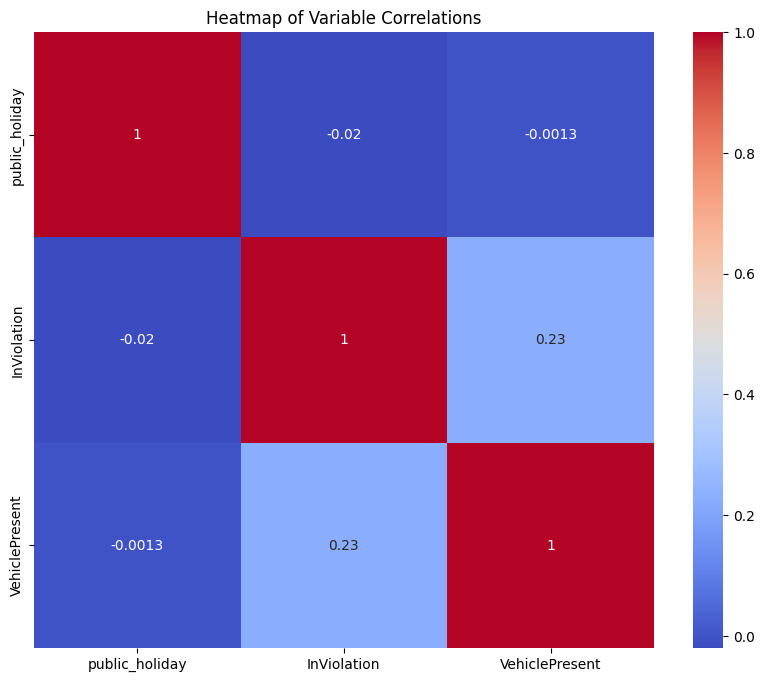

In [59]:
# Set the figure size (adjust as needed)
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Add a title
plt.title('Heatmap of Variable Correlations')

# Display the plot
plt.show()


#Feature Engineering of the Markov Chain Model

##1.State
The state of a Markov chain is the current position of the system. In the case of parking availability, the state could be "full" or "empty".

In [39]:
dataq.head(1)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,secondarrive,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,True,2,...,29,45,52,46,Friday,Weekday,19,Evening,Winter,0


In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
data=dataq

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the categorical column
data["VehiclePresent"] = encoder.fit_transform(data["VehiclePresent"])

In [41]:
# Define the occupancy levels
occupied = 1.0
empty = 0.0

# Create a new column for the state
data["State"] = data["VehiclePresent"].apply(lambda x: "occupied" if x >=occupied else "empty")

# Print the results
data.head(1)

,DeviceId,ArrivalTime,DepartureTime,DurationMinutes,AreaName,StreetName,BayId,InViolation,VehiclePresent,Month,...,minutearrive,seconddepart,minutedepart,day_of_week,day_type,arrival_hour,time_of_day,season,public_holiday,State
0,17176,2019-02-15 19:45:29,2019-02-15 19:46:52,1,Docklands,COLLINS STREET,6005,False,1,2,...,45,52,46,Friday,Weekday,19,Evening,Winter,0,occupied


In [42]:
data['State'].value_counts()


occupied    537207
empty       511368
Name: State, dtype: int64

## 2.Transition matrix/Transition Probabilities
 The transition matrix is a table that shows the probability of moving from one state to another. In the case of parking availability, the transition matrix could show the probability of a parking lot going from "full" to "empty" or from "empty" to "full".

In [43]:
#create a new column to represent the new state
data['next_state'] = data['State'].shift(-1)

In [44]:
#Count the number of times each transition occurs
transition_counts = data.groupby(['State', 'next_state']).size().reset_index(name='count')
print(transition_counts)

      State next_state   count
0     empty      empty  249801
1     empty   occupied  261567
2  occupied      empty  261567
3  occupied   occupied  275639


In [45]:
#Divide the count of each transition by the total count for the current state to get the transition probabilities.

transition_counts['probability'] = transition_counts['count'] / transition_counts.groupby('State')['count'].transform('sum')


In [46]:
print(transition_counts['probability'])

0    0.488496
1    0.511504
2    0.486903
3    0.513097
Name: probability, dtype: float64


In [47]:
# Counted transitions
empty_to_empty_count = 249801
empty_to_occupied_count =261567
occupied_to_empty_count = 261567
occupied_to_occupied_count = 275639

In [48]:
# Total number of transitions for each state
total_empty_transitions = empty_to_occupied_count + empty_to_empty_count
total_occupied_transitions = occupied_to_empty_count + occupied_to_occupied_count

In [49]:
# Calculate transition probabilities
empty_to_occupied_prob = empty_to_occupied_count / total_empty_transitions
empty_to_empty_prob = empty_to_empty_count / total_empty_transitions
occupied_to_empty_prob = occupied_to_empty_count / total_occupied_transitions
occupied_to_occupied_prob = occupied_to_occupied_count / total_occupied_transitions

In [50]:
# Construct the transition matrix
transition_matrix = [[empty_to_empty_prob, empty_to_occupied_prob],
                     [occupied_to_empty_prob, occupied_to_occupied_prob]]

print("Transition Matrix:")
print(transition_matrix)


Transition Matrix:
[[0.48849556483784673, 0.5115044351621533], [0.4869026034705495, 0.5130973965294505]]


We can interpret the above as, we see that from the "empty" state, it transitions to "full" 249801 times out of 1048575 total transitions, which gives a transition probability of 0.49.

##3.(10-step) Markov chain simulation
Once you have the transition probabilities and states, you can use them to simulate a Markov Chain

In [73]:
import numpy as np
total_empty_transitions=empty
total_occupied_transitions=occupied

In [74]:
# Define the states
states = ["empty", "occupied"]

In [75]:
# we already defined the transition probabilities
# and calculated our transition matrix which is

transition_matrix =transition_matrix

In [78]:
# Define a function to simulate the Markov Chain
def markov_chain(current_state):
    return np.random.choice(states, p=transition_matrix[states.index(current_state)])

# Define the initial state which is already defined as current_state
current_state = np.random.choice(states)

# Define the number of steps to simulate
num_steps = 10

# Simulate the Markov Chain
for _ in range(num_steps):
    print(f"Current State: {current_state}")

    # Determine the next state based on random probability
    if current_state == "empty":
        current_state = np.random.choice(states, p=transition_matrix[0])
    else:
        current_state = np.random.choice(states, p=transition_matrix[1])

print(f"Final State: {current_state}")


Current State: empty
Current State: empty
Current State: empty
Current State: empty
Current State: empty
Current State: occupied
Current State: occupied
Current State: empty
Current State: occupied
Current State: occupied
Final State: occupied


In [82]:
import numpy as np

# Assuming transition_matrix is your transition matrix
stationary_distribution = np.linalg.matrix_power(transition_matrix, 1000)[0]
print("Stationary Distribution:")
print(stationary_distribution)


Stationary Distribution:
[0.48767946 0.51232054]


The stationary distribution in a Markov Chain represents the long-term proportion of time the system is expected to spend in each state. In the context of a parking dataset, it would indicate the expected long-term occupancy distribution.

Interpreting the stationary distribution:

Each element of the stationary distribution vector corresponds to a state.
The value in each element represents the proportion of time the system is expected to spend in that state in the long run.
The stationary distribution is an equilibrium state. It doesn't change over time, assuming the Markov Chain is ergodic (i.e., it eventually visits every state with a positive probability).
For example, in our stationary distribution vector is above, it would mean that in the long run, the system is expected to spend 48.77% of the time in state 1(empty) and 51.23% of the time in state 2(occupied).

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Assuming simulated_states is the list of simulated states (up to 10 steps)
simulated_states = [0,0,0,0,0,1,1,0,1,1,1]  # Replace with your actual simulated states
# Assuming stationary_distribution is the stationary distribution vector
stationary_distribution = np.array([0.48767946,0.51232054 ])  # Replace with your actual stationary distribution

# Calculate MAE
mae = mean_absolute_error(stationary_distribution, np.bincount(simulated_states) / len(simulated_states))

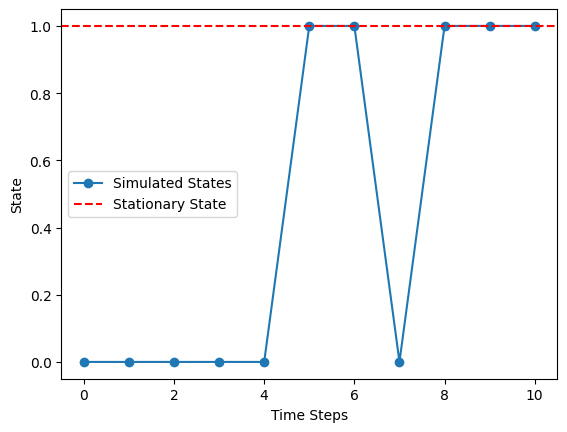

Mean Absolute Error: 0.05777508545454546


In [85]:

# Visualize states over time
time_steps = range(len(simulated_states))
plt.plot(time_steps, simulated_states, label='Simulated States', marker='o')
plt.axhline(np.argmax(stationary_distribution), color='red', linestyle='--', label='Stationary State')
plt.xlabel('Time Steps')
plt.ylabel('State')
plt.legend()
plt.show()

print(f"Mean Absolute Error: {mae}")


##4.(20-step) Markov Chain simulation

In [86]:
# Define a function to simulate the Markov Chain
def markov_chain(current_state):
    return np.random.choice(states, p=transition_matrix[states.index(current_state)])

# Define the initial state which is already defined as current_state
current_state = np.random.choice(states)

# Define the number of steps to simulate
num_steps = 20

# Simulate the Markov Chain
for _ in range(num_steps):
    print(f"Current State: {current_state}")

    # Determine the next state based on random probability
    if current_state == "empty":
        current_state = np.random.choice(states, p=transition_matrix[0])
    else:
        current_state = np.random.choice(states, p=transition_matrix[1])

print(f"Final State: {current_state}")


Current State: empty
Current State: occupied
Current State: empty
Current State: occupied
Current State: occupied
Current State: occupied
Current State: empty
Current State: occupied
Current State: empty
Current State: empty
Current State: occupied
Current State: empty
Current State: occupied
Current State: occupied
Current State: empty
Current State: occupied
Current State: occupied
Current State: empty
Current State: occupied
Current State: empty
Final State: occupied


In [98]:
# Assuming states is a list of states like ['empty', 'occupied', ...]
states1= ['empty','occupied','empty', 'occupied','occupied','occupied', 'empty','occupied','empty','empty','occupied','empty',
'occupied','occupied','empty','occupied','occupied','empty','occupied','empty','occupied']

In [99]:
# Define a mapping
state_mapping = {'empty': 0, 'occupied': 1}

In [101]:
# Apply the mapping
binary_states = [state_mapping[state] for state in states1]
print("Binary States:")
print(binary_states)

Binary States:
[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1]


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Assuming simulated_states is the list of simulated states (up to 10 steps)
simulated_states1 = binary_states  # Replace with your actual simulated states
# Assuming stationary_distribution is the stationary distribution vector
stationary_distribution = np.array([0.48767946,0.51232054 ])  # Replace with your actual stationary distribution

# Calculate MAE
mae1 = mean_absolute_error(stationary_distribution, np.bincount(simulated_states) / len(simulated_states))

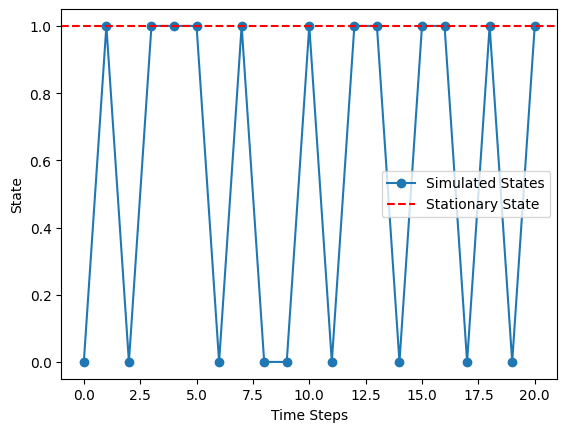

Mean Absolute Error: 0.05777508545454546


In [106]:
# Visualize states over time
time_steps = range(len(simulated_states1))
plt.plot(time_steps, simulated_states1, label='Simulated States', marker='o')
plt.axhline(np.argmax(stationary_distribution), color='red', linestyle='--', label='Stationary State')
plt.xlabel('Time Steps')
plt.ylabel('State')
plt.legend()
plt.show()

print(f"Mean Absolute Error: {mae1}")

#Feature Engineering of the Hidden Markov Chain Model

In [51]:
# Define a mapping of states to observations
state_to_observation = {
    "Empty": 0,
    "Occupied": 1
}
# Convert the 'State' column to a sequence of observations
observed_sequence = data['State'].map(state_to_observation).tolist()

print(observed_sequence)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [52]:
!pip install hmmlearn
from hmmlearn import hmm

# Assuming you have observation sequences (list of lists) where each element is either 0 or 1
observation_sequences = [observed_sequence]  # Replace with your actual data

# Define the number of states and observations
n_states = 2  # "Occupied" and "Empty"
n_observations = 2  # "Vehicle Detected" and "No Vehicle Detected"

# Create an HMM model
model = hmm.MultinomialHMM(n_components=n_states, n_iter=100, tol=0.01)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.6 MB/s eta 0:00:00


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


In [53]:
# Flatten and reshape the observation sequences
X = [item for sublist in observation_sequences for item in sublist]
X = [[x] for x in X]


In [54]:
# Fit the model to the observation sequences
# Flatten and reshape the observation sequences
X = [item for sublist in observation_sequences for item in sublist]
X = [[x] for x in X]



In [55]:




# Get the estimated initial probabilities and transition matrix
initial_probabilities = model.startprob_
transition_matrix = model.transmat_

print("Initial Probabilities:")
print(initial_probabilities)

print("\nTransition Matrix:")
print(transition_matrix)


AttributeError: ignored

In [ ]:



# This can be estimated from your historical data
startprob = np.array([0.6, 0.3, 0.1])  # Example: Initial probabilities
transmat = np.array([[0.7, 0.2, 0.1],   # Example: Transition probabilities
                     [0.3, 0.5, 0.2],
                     [0.2, 0.4, 0.4]])

# Emission probabilities (example values)
# Again, these should be estimated from your historical data
emissionprob = np.array([[0.8, 0.2],    # Example: Probabilities of observations given states
                         [0.3, 0.7],
                         [0.1, 0.9]])

# Step 4: Create the HMM model
model = hmm.MultinomialHMM(n_components=n_states)
model.startprob_ = startprob
model.transmat_ = transmat
model.emissionprob_ = emissionprob

# Step 5: Real-time Inference
# Assuming you have a function `get_sensor_reading()` to get sensor data
def get_sensor_reading():
    # Simulated function, replace with actual sensor reading
    return "Vehicle Present" if np.random.rand() < 0.7 else "No Vehicle"

# Example of real-time prediction
for _ in range(10):
    observation = get_sensor_reading()
    observation_idx = observations.index(observation)
    hidden_state = model.predict([[observation_idx]])[0]
    print(f"Predicted State: {states[hidden_state]}")

